### 简介  
通过前面几节的介绍，大家可以直观的感受到：对于大部分机器学习模型，我们通常会将其转化为一个优化问题，由于模型通常较为复杂，难以直接计算其解析解，我们会采用迭代式的优化手段，用数学语言描述如下：  

$$
\min_{v^k} f(x^k+v^k)
$$  

这里目标函数为$f(x)$，当前优化变量为$v^k$，目标即是找到一个$v^k$对当前的$x^k$进行更新，使得函数值尽可能的降低，如果目标函数一阶可微，对其作一阶泰勒展开即可得到如下梯度下降的更新公式：  

### 梯度下降
对目标函数作一阶泰勒展开：  

$$
f(x^k+v^k)=f(x^k)+\triangledown f(x^k)^Tv^k
$$  

所以要使得$f(x^k+v^k)<f(x^k)$只需要使$\triangledown f(x^k)^Tv^k<0$即可，而如果取：  

$$
v^k=-\lambda_k \triangledown f(x^k),\lambda_k>0
$$  

则一定能使$\triangledown f(x^k)^Tv^k<0$，所以，我们就得到了梯度下降的更新公式：  

$$
x^{k+1}=x^k+v^k=x^k-\lambda_k \triangledown f(x^k)
$$  

这里$\lambda_k$一般可以设置一个较小的定值，或者初始设置一个定值并使其随着迭代次数增加而递减；另外更好的做法是利用一维搜索：$min_{\lambda_k}f(x^k-\lambda_k\triangledown f(x^k))$求一个最优的$\lambda_k$，接下来我们想一下下面两个问题：  

（1）梯度下降法一定能使得函数值下降吗？  

（2）若它能使函数值下降，则它是最优的方向吗？  

对于第一个问题，泰勒展开其实是有一个条件的，那就是$v^k\rightarrow 0$，再结合上面的更新公式，如果$\lambda_k$取得过大时，我们是不能省略泰勒展开后面的项的，而且后面项的取值也不一定能保证小于0，所以有时我们设置的学习率$\lambda_k$较大时，函数值反而会上升。   

所以，当$v^k$的取值大到不能忽略后面的项时，泰勒展开的二阶项取值就必须要考虑其中了，所以这时梯度下降法未必时最优的方向，接下来我们看下二阶展开的情况：  

### 牛顿法

对其作二阶泰勒展开：  

$$
f(x^k+v^k)=f(x^k)+\triangledown f(x^k)^Tv^k+\frac{1}{2}{v^k}^T\triangledown^2 f(x^k)v^k\\
=f(x^k)+g_k^Tv^k+\frac{1}{2}{v^k}^TH_kv^k
$$  

这里为了方便，记$g_k=g(x^k)=\triangledown f(x^k),H_k=H(x^k)=\triangledown^2 f(x^k)$，$H_k$表示Hessian矩阵在$x^k$处的取值，Hessian矩阵的定义：  

$$
H(x)=[\frac{\partial f}{\partial x_i\partial x_j}]_{n\times n}
$$  

对于大部分机器学习模型，通常目标函数是凸的，所以$H(x)$半正定，即对于$\forall v^k$，都有${v^k}^TH_kv^k\geq0$，此时，$f(x^k)+g_k^Tv^k+\frac{1}{2}{v^k}^TH_kv^k$是关于$v^k$的凸二次规划问题，所以最优的$v^k$在其梯度为0处取得：  

$$
\frac{\partial f(x^k+v^k)}{\partial v^k}=g^k+H^kv^k=0\\
\Rightarrow v^k=H_k^{-1}(-g_k)
$$  

可以发现牛顿法对比梯度下降法，其实牛顿法是对梯度法的方向进行了一个改变$H_k^{-1}$，所以，我们可以得到牛顿法的更新公式：  

$$
x^{k+1}=x^k-\lambda_kH_k^{-1}g_k\\
=x^k+\lambda_k p_k
$$  

这里记$p_k=-H_k^-1g_k$；  

可以发现牛顿法的复杂有点高，因为要求解$H_k^{-1}$，那么有没有方便一点的方法呢？比如构建一个矩阵去近似$H_k$或者$H_k^{-1}$，这便是拟牛顿法的基本思想

### 拟牛顿条件  
上面说到了利用一个矩阵去近似Hessian矩阵或者Hessian矩阵的逆，那么这个近似矩阵需要满足怎样的条件呢？我们还是从二阶泰勒展开出发，稍微变换一下：  
$$
f(x^{k+1})=f(x^k)+g_k^T(x^{k+1}-x^k)+\frac{1}{2}(x^{k+1}-x^k)^TH_k(x^{k+1}-x^k)
$$  

两边对$x^{k+1}$求偏导可得：  

$$
g_{k+1}=g_k+H_k(x^{k+1}-x^k)
$$  

这便是拟牛顿条件，为了方便，记$y_k=g_{k+1}-g_k,\delta_k=x^{k+1}-x^k$，所以：  

$$
y_k=H_k\delta_k
$$  

所以，拟牛顿法也要满足和$H_k$一样的性质：  

（1）正定性； 

（2）满足拟牛顿条件  

接下来，简单证明一下如果满足性质（1）：正定性，更新时可以满足函数值下降，假设$G_k$去近似$H_k^{-1}$，所以：$G_k\succ 0$，那么迭代公式为： 

$$
x^{k+1}=x^k-\lambda_kG_kg_k,\lambda_k>0
$$  

将其带入二阶泰勒展开式中：  

$$
f(x^{k+1})=f(x^k)-\lambda_kg_k^TG_kg_k+\frac{1}{2}\lambda_k^2g_k^TG_k^TH_kG_kg_k
$$  

通常$\lambda_k^2<<\lambda_k$，所以可以省略第三项，而第二项由于$G_k\succ 0$，所以$-\lambda_kg_k^TG_kg_k< 0$，所以$f(x^{k+1})<f(x^k)$

### 五.DFP算法
DFP算法便是利用$G_k$近似$H_k^{-1}$的一种算法，它的构造很tricky，它假设每一步迭代中矩阵$G_{k+1}$是由$G_k$加上两个附加项构成的，即：  

$$
G_{k+1}=G_k+P_k+Q_k
$$  

这里$P_k,Q_k$是待定项，由于需要满足拟牛顿条件，所以：  

$$
G_{k+1}y_k=\delta_k=G_ky_k+P_ky_k+Q_ky_k
$$  

这里做一个tricky的假设：  

$$
P_ky_k=\delta_k\\
Q_ky_k=-G_ky_k
$$  

这样的$P_k,Q_k$不难找到：  

$$
P_k=\frac{\delta_k\delta_k^T}{\delta_k^Ty_k}\\
Q_k=-\frac{G_ky_ky_k^TG_k}{y_k^TG_ky_k}
$$  

所以，矩阵$G_{k+1}$的迭代公式：  

$$
G_{k+1}=G_k+\frac{\delta_k\delta_k^T}{\delta_k^Ty_k}-\frac{G_ky_ky_k^TG_k}{y_k^TG_ky_k}
$$  


可以证明，只要初始矩阵$G_0$正定对称，则迭代过程中的每个矩阵$G_k$均正定对称，接下来对其进行代码实现：  

In [1]:
import numpy as np
"""
DPF拟牛顿法,封装到ml_models.optimization模块,与梯度下降法配合使用
"""


class DFP(object):
    def __init__(self, x0, g0):
        """

        :param x0: 初始的x
        :param g0: 初始x对应的梯度
        """
        self.x0 = x0
        self.g0 = g0
        # 初始化G0
        self.G0 = np.eye(len(x0))

    def update_quasi_newton_matrix(self, x1, g1):
        """
        更新拟牛顿矩阵
        :param x1:
        :param g1:
        :return:
        """
        # 进行一步更新
        y0 = g1 - self.g0
        delta0 = x1 - self.x0
        self.G0 = self.G0 + delta0.dot(delta0.T) / delta0.T.dot(y0)[0][0] - self.G0.dot(y0).dot(y0.T).dot(self.G0) / y0.T.dot(
            self.G0).dot(y0)[0][0]

    def adjust_gradient(self, gradient):
        """
        对原始的梯度做调整
        :param gradient:
        :return:
        """
        return self.G0.dot(gradient)

#### 应用到LogisticRegression
我们试一试将DFP算法应用到LogisticRegression，修改的地方如下：  

`fit`函数追加如下的一个判断：  

```python
elif self.solver == 'dfp':
    self.dfp = None
    self._fit_sgd(x, y)
```  

`_fit_sgd`函数中，在梯度更新前做如下调整：  

```python
if self.solver == 'dfp':
    if self.dfp is None:
        self.dfp = optimization.DFP(x0=self.w, g0=dw)
    else:
        # 更新一次拟牛顿矩阵
        self.dfp.update_quasi_newton_matrix(self.w, dw)
    # 调整梯度方向
    dw = self.dfp.adjust_gradient(dw)
```

In [2]:
"""
梯度下降和DFP做一下对比
"""
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt
%matplotlib inline

data, target = make_classification(n_samples=200, n_features=2, n_classes=2, n_informative=1, n_redundant=0,
                                   n_repeated=0, n_clusters_per_class=1)
target = target.reshape(200, 1)

In [3]:
import copy
"""
Logistic回归
"""
def sign(x):
    """
    符号函数
    :param x:
    :return:
    """
    if x > 0:
        return 1
    elif x < 0:
        return -1
    else:
        return 0

def sigmoid(x2):
    """
    sigmoid函数
    :param x2:
    :return:
    """
    x = copy.deepcopy(x2)
    if type(x) is int:
        x = 20.0 if x > 20.0 else x
        x = -100.0 if x < -100.0 else x
    else:
        # 避免下溢
        x[x > 20.0] = 20.0
        # 避免上溢
        x[x < -100.0] = -100.0
    return 1 / (1 + np.exp(-x))

class LogisticRegression(object):
    def __init__(self, fit_intercept=True, solver='sgd', if_standard=True, l1_ratio=None, l2_ratio=None, epochs=10,
                 eta=None, batch_size=16):

        self.w = None
        self.fit_intercept = fit_intercept
        self.solver = solver
        self.if_standard = if_standard
        if if_standard:
            self.feature_mean = None
            self.feature_std = None
        self.epochs = epochs
        self.eta = eta
        self.batch_size = batch_size
        self.l1_ratio = l1_ratio
        self.l2_ratio = l2_ratio
        # 注册sign函数
        self.sign_func = np.vectorize(sign)
        # 记录losses
        self.losses = []

    def init_params(self, n_features):
        """
        初始化参数
        :return:
        """
        self.w = np.random.random(size=(n_features, 1))

    def _fit_sgd(self, x, y, sample_weight):
        """
        随机梯度下降求解
        :param x:
        :param y:
        :return:
        """
        x_y = np.c_[x, y]
        count = 0
        for _ in range(self.epochs):
            np.random.shuffle(x_y)
            for index in range(x_y.shape[0] // self.batch_size):
                count += 1
                batch_x_y = x_y[self.batch_size * index:self.batch_size * (index + 1)]
                batch_x = batch_x_y[:, :-1]
                batch_y = batch_x_y[:, -1:]

                # 考虑sample_weight
                sample_weight_diag = np.diag(sample_weight[self.batch_size * index:self.batch_size * (index + 1)])
                sample_weight_mean = np.mean(sample_weight[self.batch_size * index:self.batch_size * (index + 1)])

                dw = -1 * (batch_y - sigmoid(batch_x.dot(self.w))).T.dot(sample_weight_diag).dot(
                    batch_x) / self.batch_size
                dw = dw.T

                # 添加l1和l2的部分
                dw_reg = np.zeros(shape=(x.shape[1] - 1, 1))
                if self.l1_ratio is not None:
                    dw_reg += sample_weight_mean * self.l1_ratio * self.sign_func(self.w[:-1]) / self.batch_size
                if self.l2_ratio is not None:
                    dw_reg += 2 * sample_weight_mean * self.l2_ratio * self.w[:-1] / self.batch_size
                dw_reg = np.concatenate([dw_reg, np.asarray([[0]])], axis=0)

                dw += dw_reg

                if self.solver == 'dfp':
                    if self.dfp is None:
                        self.dfp = DFP(x0=self.w, g0=dw)
                    else:
                        # 更新一次拟牛顿矩阵
                        self.dfp.update_quasi_newton_matrix(self.w, dw)
                    # 调整梯度方向
                    dw = self.dfp.adjust_gradient(dw)

                if self.solver == 'bfgs':
                    if self.bfgs is None:
                        self.bfgs = BFGS(x0=self.w, g0=dw)
                    else:
                        # 更新一次拟牛顿矩阵
                        self.bfgs.update_quasi_newton_matrix(self.w, dw)
                    # 调整梯度方向
                    dw = self.bfgs.adjust_gradient(dw)
                self.w = self.w - self.eta * dw

            # 计算losses
            cost = -1 * np.sum(
                np.multiply(y, np.log(sigmoid(x.dot(self.w)))) + np.multiply(1 - y, np.log(
                    1 - sigmoid(x.dot(self.w)))))
            self.losses.append(cost)

    def fit(self, x, y2, sample_weight=None):
        """
        :param x: ndarray格式数据: m x n
        :param y2: ndarray格式数据: m
        :return:
        """
        n_sample = x.shape[0]
        if sample_weight is None:
            sample_weight = np.asarray([1.0] * n_sample)
        # check sample_weight
        if len(sample_weight) != n_sample:
            raise Exception('sample_weight size error:', len(sample_weight))
        y = y2.reshape(x.shape[0], 1)
        # 是否归一化feature
        if self.if_standard:
            self.feature_mean = np.mean(x, axis=0)
            self.feature_std = np.std(x, axis=0) + 1e-8
            x = (x - self.feature_mean) / self.feature_std
        # 是否训练bias
        if self.fit_intercept:
            x = np.c_[x, np.ones_like(y)]
        # 初始化参数
        self.init_params(x.shape[1])
        # 更新eta
        if self.eta is None:
            self.eta = self.batch_size / np.sqrt(x.shape[0])

        if self.solver == 'sgd':
            self._fit_sgd(x, y, sample_weight)
        elif self.solver == 'dfp':
            self.dfp = None
            self._fit_sgd(x, y, sample_weight)
        elif self.solver == 'bfgs':
            self.bfgs = None
            self._fit_sgd(x, y, sample_weight)

    def get_params(self):
        """
        输出原始的系数
        :return: w,b
        """
        if self.fit_intercept:
            w = self.w[:-1]
            b = self.w[-1]
        else:
            w = self.w
            b = 0
        if self.if_standard:
            w = w / self.feature_std.reshape(-1, 1)
            b = b - w.T.dot(self.feature_mean.reshape(-1, 1))
        return w.reshape(-1), b

    def predict_proba(self, x):
        """
        预测为y=1的概率
        :param x:ndarray格式数据: m x n
        :return: m x 2
        """
        if self.if_standard:
            x = (x - self.feature_mean) / self.feature_std
        if self.fit_intercept:
            x = np.c_[x, np.ones(x.shape[0])]
        return np.c_[1.0 - sigmoid(x.dot(self.w)), sigmoid(x.dot(self.w))]

    def predict(self, x):
        """
        预测类别，默认大于0.5的为1，小于0.5的为0
        :param x:
        :return:
        """
        return np.argmax(self.predict_proba(x), axis=1)

    def plot_decision_boundary(self, x, y):
        """
        绘制前两个维度的决策边界
        :param x:
        :param y:
        :return:
        """
        y = y.reshape(-1)
        weights, bias = self.get_params()
        w1 = weights[0]
        w2 = weights[1]
        bias = bias[0][0]
        x1 = np.arange(np.min(x), np.max(x), 0.1)
        x2 = -w1 / w2 * x1 - bias / w2
        plt.scatter(x[:, 0], x[:, 1], c=y, s=50)
        plt.plot(x1, x2, 'r')
        plt.show()

    def plot_losses(self):
        plt.plot(range(0, len(self.losses)), self.losses)
        plt.show()


In [4]:
sgd_model = LogisticRegression(epochs=50)
sgd_model.fit(data, target)

dfp_model = LogisticRegression(solver='dfp',epochs=50)
dfp_model.fit(data,target)

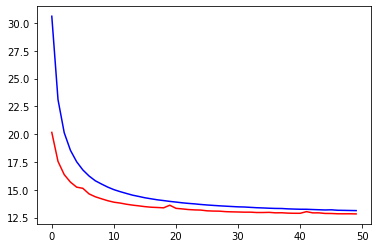

In [5]:
#损失函数对比
plt.plot(range(0, len(sgd_model.losses)), sgd_model.losses,'b')
plt.plot(range(0, len(dfp_model.losses)), dfp_model.losses,'r')

可以发现，大部分情况下DFP比SGD收敛的更快，且收敛效果更好

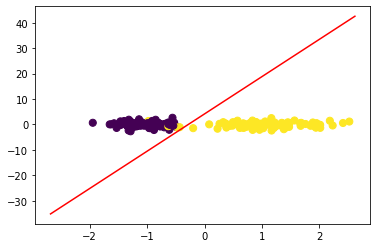

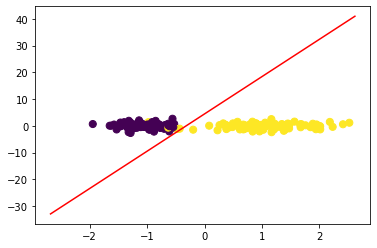

In [6]:
#分类效果对比
sgd_model.plot_decision_boundary(data,target)
dfp_model.plot_decision_boundary(data,target)

### 六.BFGS算法

BFGS算法是用一个矩阵$B_k$去模拟海瑟矩阵$H_k$，它的更新公式同样假设有两个附加项：  

$$
B_{k+1}=B_k+P_k+Q_k
$$  

当然，它需要满足拟牛顿条件：  

$$
B_{k+1}\delta_k=y_k
$$  

所以：  

$$
B_{k+1}\delta_k=B_k\delta_k+P_k\delta_k+Q_k\delta_k=y_k
$$  

考虑，使$P_k$和$Q_k$满足下面两个条件：  

$$
P_k\delta_k=y_k\\
Q_k\delta_k=-B_k\delta_k
$$  

可以得到满足条件的解：  

$$
P_k=\frac{y_ky_k^T}{y_k^T\delta_k}\\
Q_k=-\frac{B_k\delta_k\delta_k^TB_k}{\delta_k^TB_k\delta_k}
$$  

所以更新公式：  

$$
B_{k+1}=B_k+\frac{y_ky_k^T}{y_k^T\delta_k}-\frac{B_k\delta_k\delta_k^TB_k}{\delta_k^TB_k\delta_k}
$$  

同样可以证明，如果$B_0$正定对称，那么迭代过程中的每个矩阵$B_k$都是正定对称的，由于这里是对$H_k$的近似，所以每次更新梯度时，还需要对$B_k$做求逆计算，我们可以使用两次如下的Sherman-Morrison公式：  

$$
(A+uu^T)^{-1}=A^{-1}-\frac{A^{-1}uu^TA^{-1}}{1+u^TA^{-1}u}
$$

得到BFGS算法关于$G_k$的迭代公式：  

$$
G_{k+1}=(I-\frac{\delta_ky_k^T}{\delta_k^Ty_k})G_k(I-\frac{\delta_ky_k^T}{\delta_k^Ty_k})^T+\frac{\delta_k\delta_k^T}{\delta_k^Ty_k}
$$  

接下来，进行代码实现：  

In [7]:
"""
BFGS拟牛顿法,封装到ml_models.optimization模块,与梯度下降法配合使用
"""


class BFGS(object):
    def __init__(self, x0, g0):
        """

        :param x0: 初始的x
        :param g0: 初始x对应的梯度
        """
        self.x0 = x0
        self.g0 = g0
        # 初始化B0
        self.B0 = np.eye(len(x0))

    def update_quasi_newton_matrix(self, x1, g1):
        """
        更新拟牛顿矩阵
        :param x1:
        :param g1:
        :return:
        """
        # 进行一步更新
        y0 = g1 - self.g0
        delta0 = x1 - self.x0
        self.B0 = self.B0 + y0.dot(y0.T) / y0.T.dot(delta0)[0][0] - self.B0.dot(delta0).dot(delta0.T).dot(self.B0) / \
                                                                    delta0.T.dot(self.B0).dot(delta0)[0][0]

    def adjust_gradient(self, gradient):
        """
        对原始的梯度做调整
        :param gradient:
        :return:
        """
        return np.linalg.pinv(self.B0).dot(gradient)

#### 应用到LogisticRegression

`fit`函数追加如下的一个判断：  

```python
elif self.solver == 'bfgs':
    self.bfgs = None
    self._fit_sgd(x, y)
```  

`_fit_sgd`函数中，在梯度更新前做如下调整：  

```python
if self.solver == 'bfgs':
    if self.bfgs is None:
        self.bfgs = optimization.BFGS(x0=self.w, g0=dw)
    else:
        # 更新一次拟牛顿矩阵
        self.bfgs.update_quasi_newton_matrix(self.w, dw)
    # 调整梯度方向
    dw = self.bfgs.adjust_gradient(dw)
```

In [8]:
#训练模型
bfgs_model = LogisticRegression(solver='bfgs',epochs=50)
bfgs_model.fit(data,target)

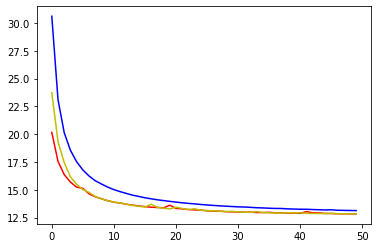

In [9]:
#损失函数对比
plt.plot(range(0, len(sgd_model.losses)), sgd_model.losses,'b')
plt.plot(range(0, len(dfp_model.losses)), dfp_model.losses,'r')
plt.plot(range(0, len(bfgs_model.losses)), bfgs_model.losses,'y')

可以发现大部分情况下BFGS会比DFS收敛更快

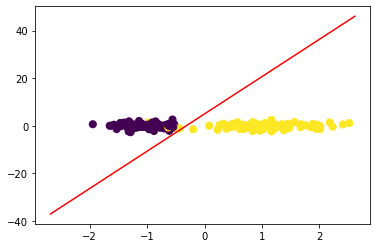

In [10]:
#查看效果
bfgs_model.plot_decision_boundary(data,target)